In [243]:
import random
from PIL import Image
import matplotlib.pyplot as plt

from constant import TARGET2CLASS_MAPPING, CLASS2OBJECT_MAPPING, OBJECT_PROMPT_LIST, LIVE_PROMPT_LIST

MODEL_LIST = [
        "constant_05",
        "constant_10",
        "linear",
        "relu_100",
        "relu_500",
        "relu_900",
        "sigmoid",
        "sine",
    ]

input_file_path = "../dreambooth/dataset"
gen_file_path = "../inference_output/sd_v15"

In [262]:
target = "dog"
prompt_idx = random.randint(0, 24)
image_idx = random.randint(0, 3)
file_name = f"prompt_{prompt_idx:02d}_image_{image_idx:02d}.jpg"

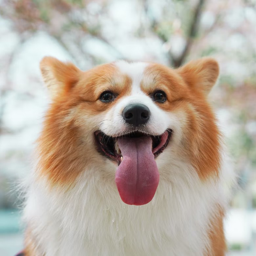

a dog on the beach


In [263]:
# input
input_image = Image.open(f"{input_file_path}/{target}/00.jpg")
input_image = input_image.resize((256, 256))
input_image.show()

target_class = TARGET2CLASS_MAPPING[target]
if CLASS2OBJECT_MAPPING[target_class]:
    prompt_ls = OBJECT_PROMPT_LIST
else:
    prompt_ls = LIVE_PROMPT_LIST
text = prompt_ls[prompt_idx]
print(text.format(target_class))

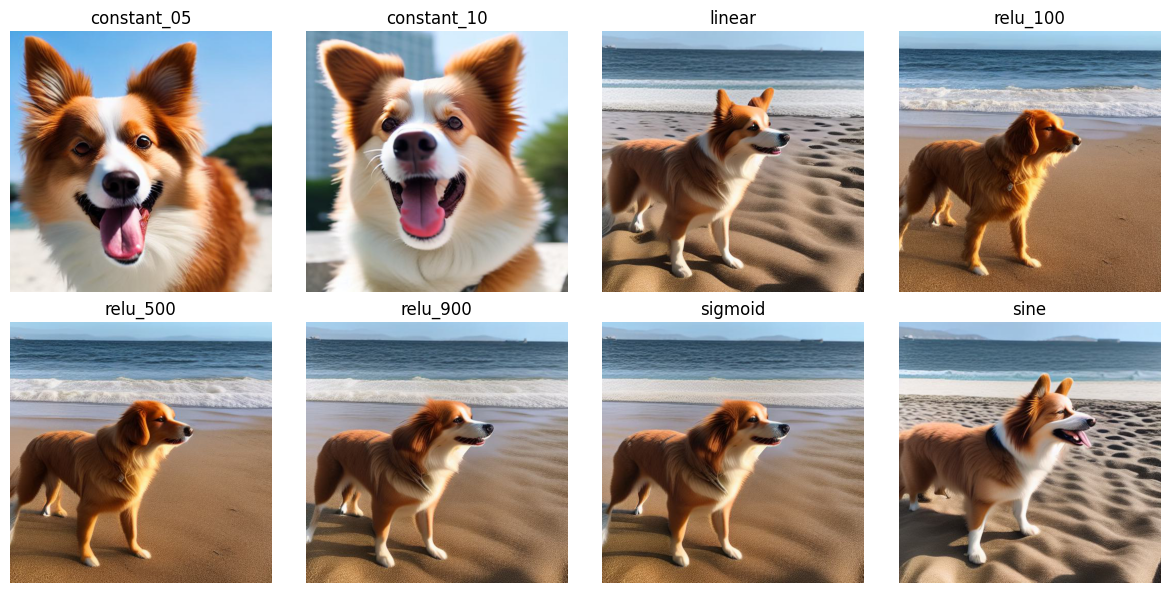

In [264]:
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
for i, model in enumerate(MODEL_LIST):
    model_file_path = f"{gen_file_path}/{model}/{target}/{file_name}"
    image = Image.open(model_file_path)
    ax = axes[i // 4, i % 4]
    ax.imshow(image)
    ax.set_title(model)
    ax.axis('off')
plt.tight_layout()
plt.savefig(f"./sd_v15/{target}_prompt_{prompt_idx:02d}_image_{image_idx:02d}.jpg")
plt.show()